In [358]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import missingno as mn

In [359]:
#Load data
test_df = pd.read_csv('Test.csv')
train_df = pd.read_csv('Train.csv')
#Drop unused features
train_df = train_df.drop(['PassengerId','boat','body','home.dest','ticket','age','cabin'], axis=1)
test_df = test_df.drop(['PassengerId','boat','body','home.dest','ticket','age','cabin'], axis=1)

In [360]:
#Ensure that data types are correct as needed
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      890 non-null    object 
 1   pclass    890 non-null    int64  
 2   survived  890 non-null    int64  
 3   sex       890 non-null    int64  
 4   age_rnd   890 non-null    int64  
 5   sibsp     890 non-null    int64  
 6   parch     890 non-null    int64  
 7   fare      890 non-null    float64
 8   Decks     890 non-null    int64  
 9   Location  890 non-null    int64  
 10  embarked  890 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 76.6+ KB


In [361]:
#Review for anomalies
train_df.describe()

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.307865,0.384270,0.352809,29.725843,0.523596,0.382022,32.231685,5.025843,0.639326,1.537079
std,0.836220,0.486696,0.478113,13.302533,1.103224,0.806409,49.714597,1.435688,0.673476,0.791743
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.925000,5.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,30.000000,0.000000,0.000000,14.454200,5.000000,1.000000,2.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,6.000000,1.000000,2.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,7.000000,2.000000,2.000000


In [362]:
#Check features 
train_df.head(8)

,name,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked
0,"Braund, Mr. Owen Harris",3,0,0,22,1,0,7.2500,6,1,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,38,1,0,71.2833,3,1,0
2,"Heikkinen, Miss. Laina",3,1,1,26,0,0,7.9250,5,1,2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,35,1,0,53.1000,3,2,2
4,"Allen, Mr. William Henry",3,0,0,35,0,0,8.0500,5,0,2
5,"Moran, Mr. James",3,0,0,33,0,0,8.4583,7,1,1
6,"McCarthy, Mr. Timothy J",1,0,0,54,0,0,51.8625,5,0,2
7,"Palsson, Master. Gosta Leonard",3,0,0,2,3,1,21.0750,6,0,2


In [363]:
train_df.columns.values

array(['name', 'pclass', 'survived', 'sex', 'age_rnd', 'sibsp', 'parch',
       'fare', 'Decks', 'Location', 'embarked'], dtype=object)

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


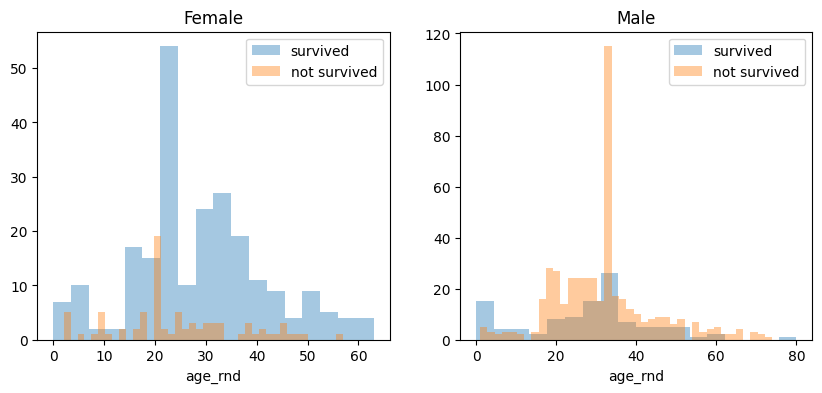

In [364]:
#General assessment across age and survival rate
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['sex']==1]
men = train_df[train_df['sex']==0]
ax = sns.distplot(women[women['survived']==1].age_rnd.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age_rnd.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age_rnd.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age_rnd.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

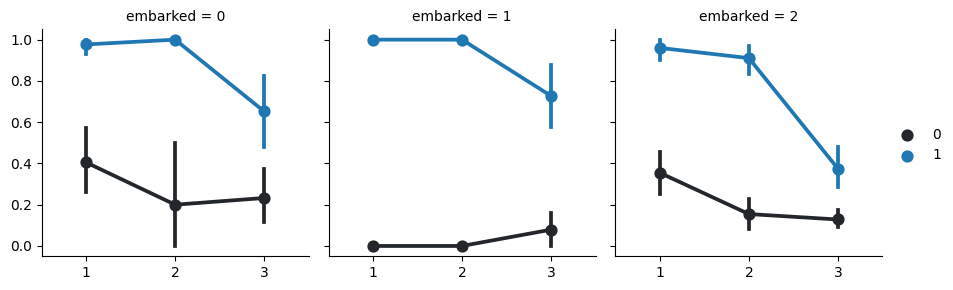

In [365]:
#Review correlations between features, here we are looking at Sex, Embarked and survival rate
FacetGrid_embarked = sns.FacetGrid(train_df, col="embarked")
FacetGrid_embarked.map_dataframe(sns.pointplot, x="pclass", y="survived", hue="sex")
FacetGrid_embarked.add_legend()

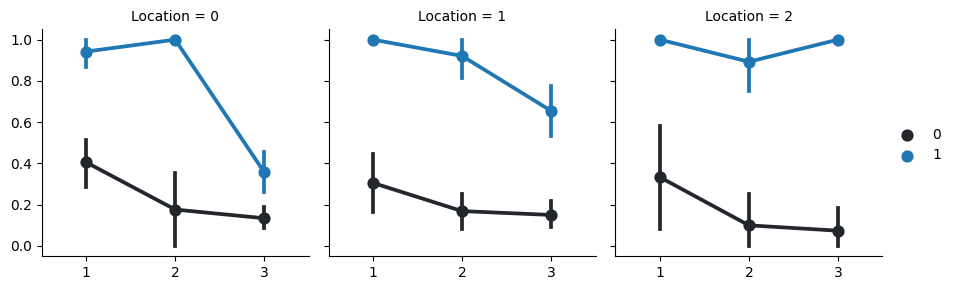

In [366]:
#Review correlations between features, here we are looking at Sex, location and survival rate
FacetGrid_Location = sns.FacetGrid(train_df, col="Location")
FacetGrid_Location.map_dataframe(sns.pointplot, x="pclass", y="survived", hue="sex")
FacetGrid_Location.add_legend()

<Axes: xlabel='pclass', ylabel='survived'>

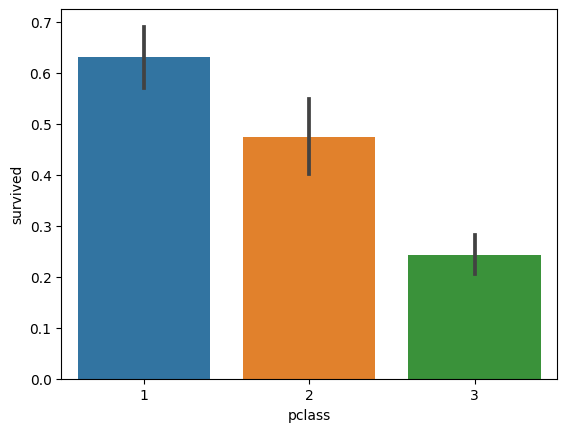

In [367]:
#Double check weighting of class, as shown in earlier exploration
sns.barplot(x='pclass', y='survived', data=train_df)

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


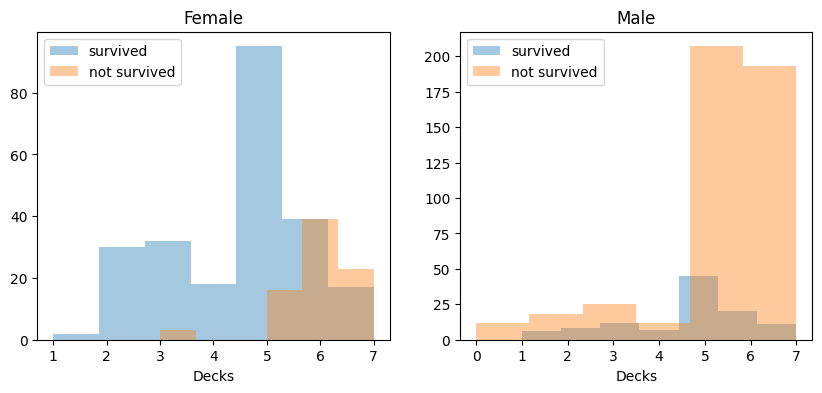

In [368]:
#Review survival rates in relation to Deck levels
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['sex']==1]
men = train_df[train_df['sex']==0]
ax = sns.distplot(women[women['survived']==1].Decks.dropna(), bins=7, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].Decks.dropna(), bins=6, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].Decks.dropna(), bins=7, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].Decks.dropna(), bins=6, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

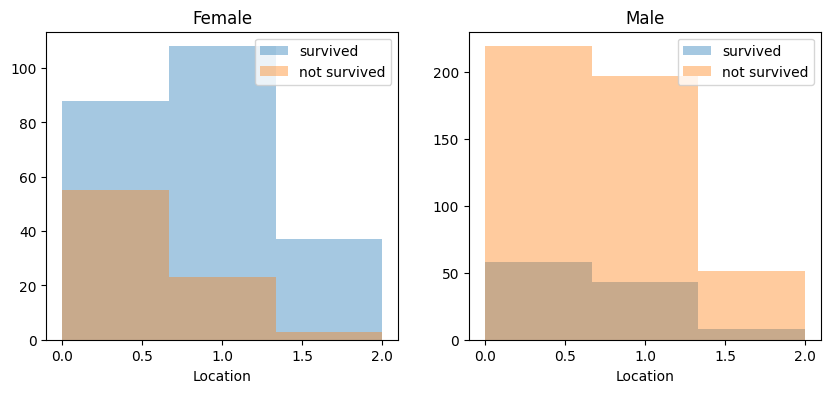

In [369]:
#Review survival rates in relation to locations
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['sex']==1]
men = train_df[train_df['sex']==0]
ax = sns.distplot(women[women['survived']==1].Location.dropna(), bins=3, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].Location.dropna(), bins=3, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].Location.dropna(), bins=3, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].Location.dropna(), bins=3, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

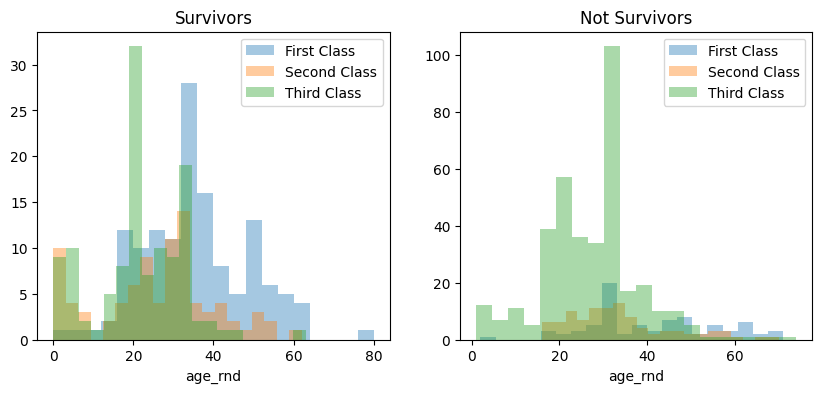

In [370]:
#Review survival rates across age and class categories to compare class and age disparity

fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10, 4))
First = train_df[train_df['pclass']==1]
Second = train_df[train_df['pclass']==2]
Third = train_df[train_df['pclass']==3]

ax1 = sns.distplot(First[First['survived']==1].age_rnd.dropna(), bins=20, label = 'First Class', ax = axes[0], kde =False)
ax1 = sns.distplot(Second[Second['survived']==1].age_rnd.dropna(), bins=20, label = 'Second Class', ax = axes[0], kde =False)
ax1 = sns.distplot(Third[Third['survived']==1].age_rnd.dropna(), bins=20, label = 'Third Class', ax = axes[0], kde =False)
ax1.legend()
ax1.set_title('Survivors')
ax1 = sns.distplot(First[First['survived']==0].age_rnd.dropna(), bins=20, label = 'First Class', ax = axes[1], kde =False)
ax1 = sns.distplot(Second[Second['survived']==0].age_rnd.dropna(), bins=20, label = 'Second Class', ax = axes[1], kde =False)
ax1 = sns.distplot(Third[Third['survived']==0].age_rnd.dropna(), bins=20, label = 'Third Class', ax = axes[1], kde =False)
ax1.legend()
_ = ax1.set_title('Not Survivors')

Text(0.5, 1.0, 'Male 1st Class')

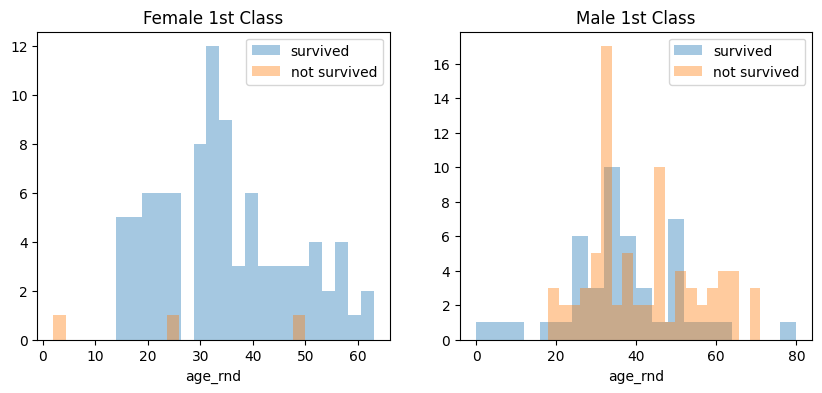

In [371]:
#Deep dive sex vs class and age

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10, 4))
women = train_df[train_df['sex']==1]
men = train_df[train_df['sex']==0]

women1 = women[women['pclass']==1]
men1 = men[men['pclass']==1]
ax1 = sns.distplot(women1[women1['survived']==1].age_rnd.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax1 = sns.distplot(women1[women1['survived']==0].age_rnd.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax1.legend()
ax1.set_title('Female 1st Class')
ax1 = sns.distplot(men1[men1['survived']==1].age_rnd.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax1 = sns.distplot(men1[men1['survived']==0].age_rnd.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax1.legend()
ax1.set_title('Male 1st Class')



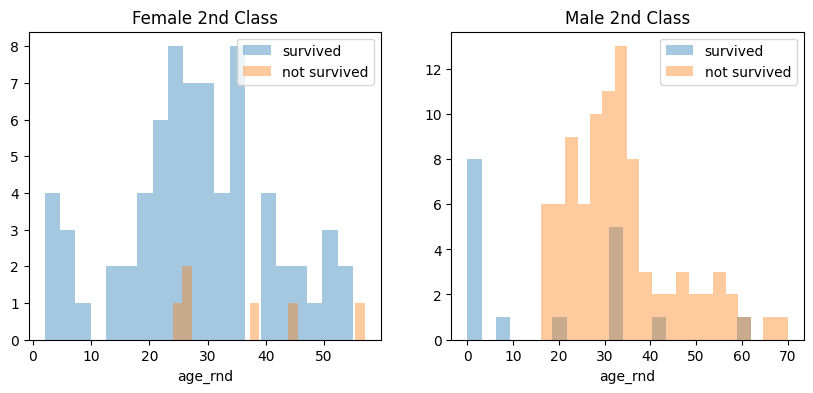

In [372]:
#Deep dive sex vs class and age

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10, 4))
women = train_df[train_df['sex']==1]
men = train_df[train_df['sex']==0]

women2 = women[women['pclass']==2]
men2 = men[men['pclass']==2]
ax2 = sns.distplot(women2[women2['survived']==1].age_rnd.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax2 = sns.distplot(women2[women2['survived']==0].age_rnd.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax2.legend()
ax2.set_title('Female 2nd Class')
ax2 = sns.distplot(men2[men2['survived']==1].age_rnd.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax2 = sns.distplot(men2[men2['survived']==0].age_rnd.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax2.legend()
_ = ax2.set_title('Male 2nd Class')



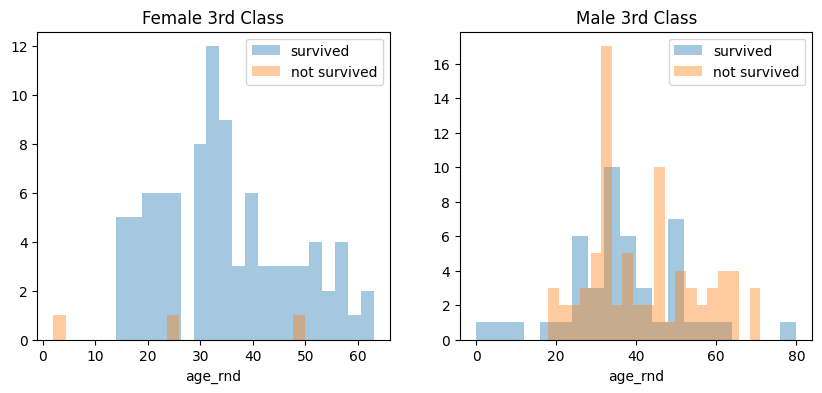

In [373]:
#Deep dive sex vs class and age

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10, 4))
women = train_df[train_df['sex']==1]
men = train_df[train_df['sex']==0]

women3 = women[women['pclass']==1]
men3 = men[men['pclass']==1]
ax3 = sns.distplot(women3[women3['survived']==1].age_rnd.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax3 = sns.distplot(women3[women3['survived']==0].age_rnd.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax3.legend()
ax3.set_title('Female 3rd Class')
ax3 = sns.distplot(men3[men3['survived']==1].age_rnd.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax3 = sns.distplot(men3[men3['survived']==0].age_rnd.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax3.legend()
_ = ax3.set_title('Male 3rd Class')

In [374]:
#Create new 'not_alone' feature, based on relatives feature
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['sibsp']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    607
0    283
Name: count, dtype: int64

In [375]:
#Had to split the data for train and test, because it would not update as a grouped item
data2 = [test_df]
for dataset in data2:
    dataset['relatives'] = dataset['sibsp'] + dataset['sibsp']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
test_df['not_alone'].value_counts()

not_alone
1    284
0    135
Name: count, dtype: int64

C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Whistlingwind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


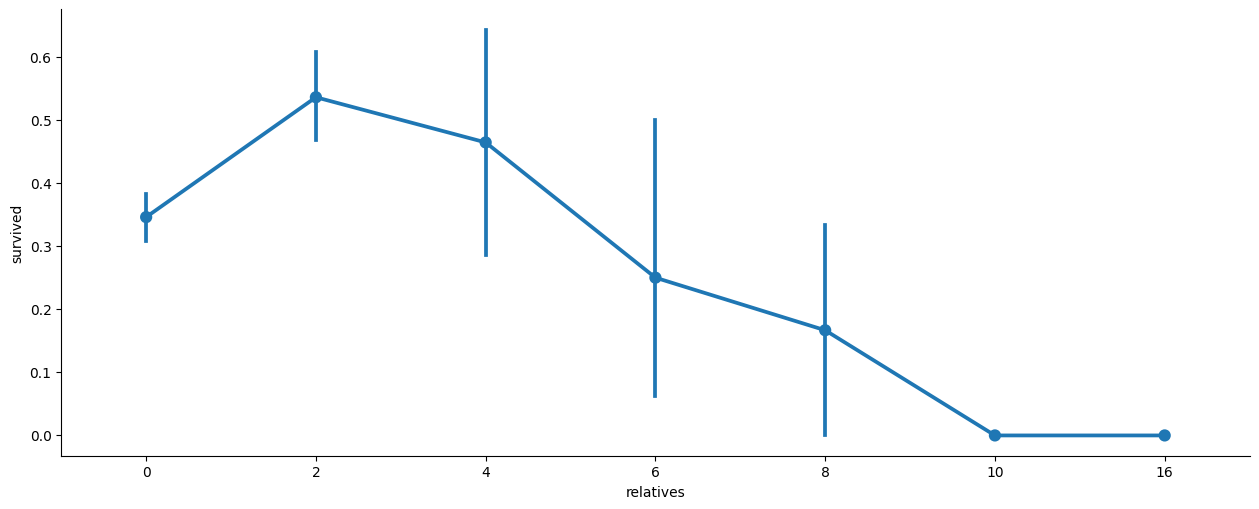

In [376]:
#Review plot to see relationship of relatives vs survival rate
axes = sns.factorplot('relatives','survived', 
                      data=train_df, aspect = 2.5, )

<Axes: >

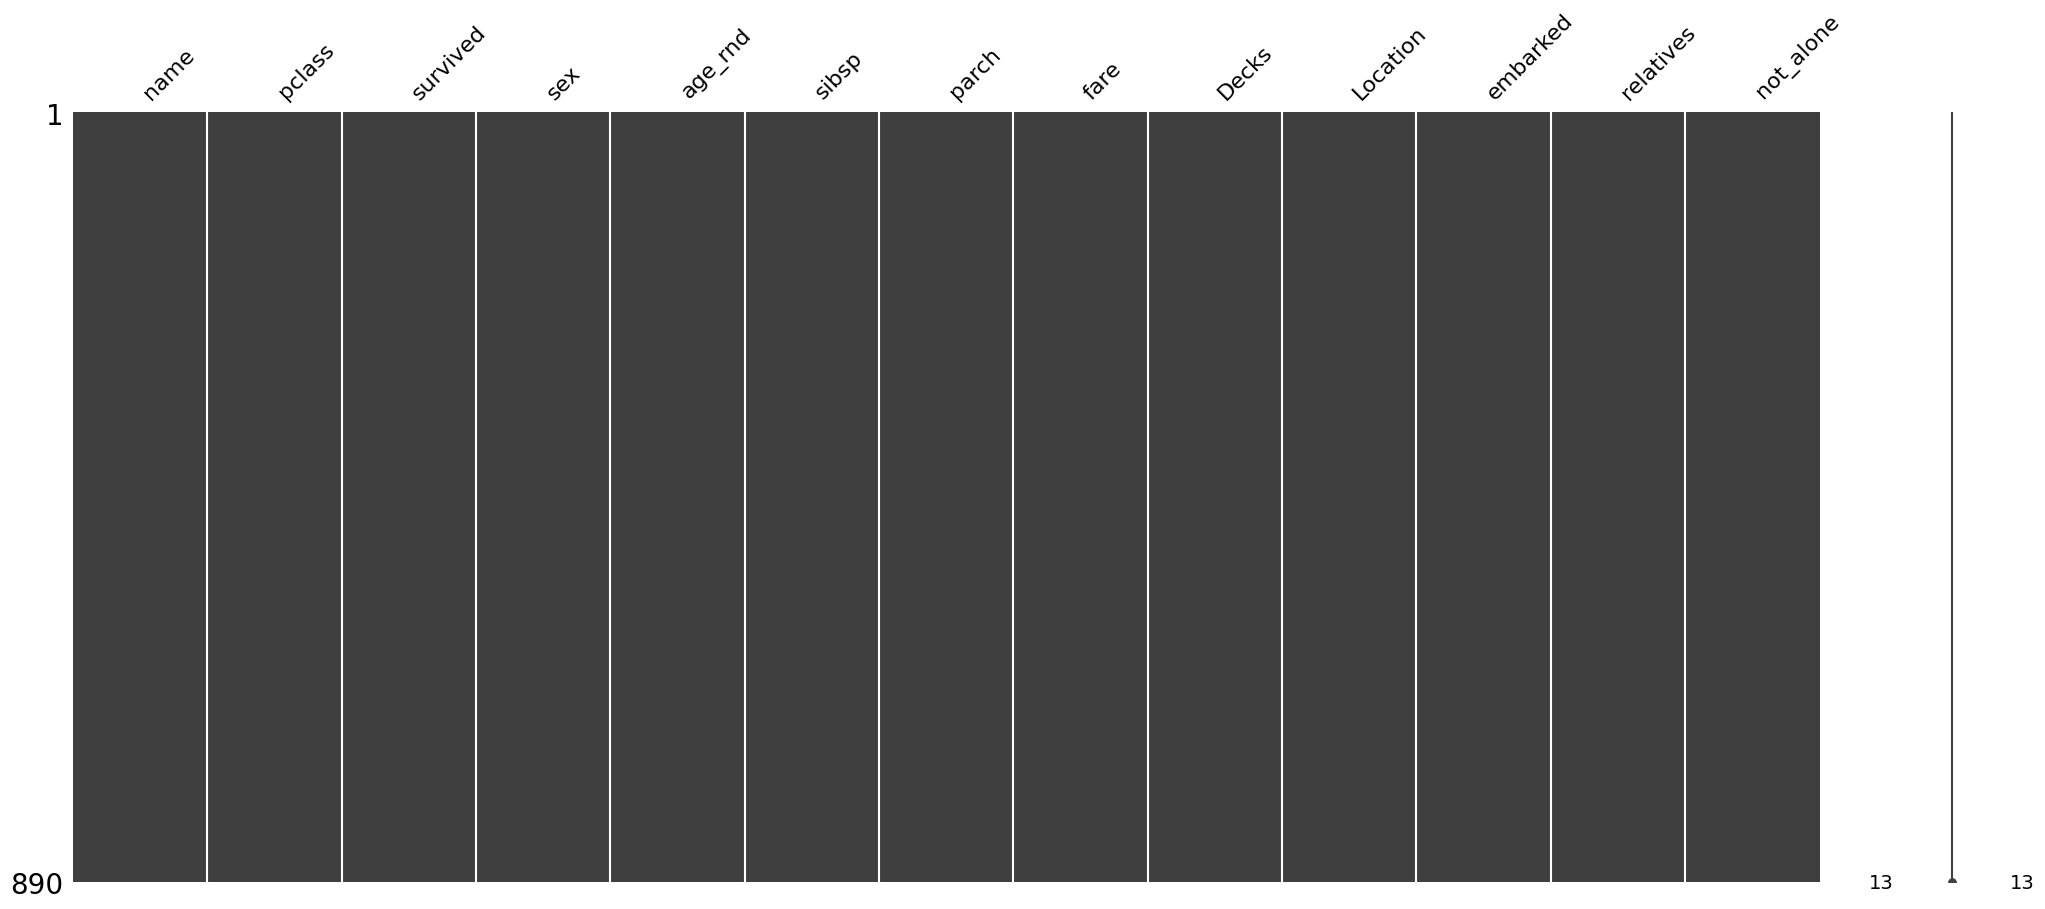

In [377]:
#Doublecheck for any data discrepancies
mn.matrix(train_df)

In [378]:
#Check for any data type issues
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       890 non-null    object 
 1   pclass     890 non-null    int64  
 2   survived   890 non-null    int64  
 3   sex        890 non-null    int64  
 4   age_rnd    890 non-null    int64  
 5   sibsp      890 non-null    int64  
 6   parch      890 non-null    int64  
 7   fare       890 non-null    float64
 8   Decks      890 non-null    int64  
 9   Location   890 non-null    int64  
 10  embarked   890 non-null    int64  
 11  relatives  890 non-null    int64  
 12  not_alone  890 non-null    int32  
dtypes: float64(1), int32(1), int64(10), object(1)
memory usage: 87.0+ KB


In [379]:
#Change datatype to int for fare from float and replace NaN with zeros
data = [train_df]
for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)
data2 = [test_df]
for dataset in data2:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [380]:
train_df.head()

,name,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone
0,"Braund, Mr. Owen Harris",3,0,0,22,1,0,7,6,1,2,2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,38,1,0,71,3,1,0,2,0
2,"Heikkinen, Miss. Laina",3,1,1,26,0,0,7,5,1,2,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,35,1,0,53,3,2,2,2,0
4,"Allen, Mr. William Henry",3,0,0,35,0,0,8,5,0,2,0,1


In [381]:
test_df.head()

,name,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone
0,"Dooley, Mr. Patrick",3,0,0,32,0,0,7,6,0,1,0,1
1,"Kelly, Mr. James",3,0,0,34,0,0,7,5,1,1,0,1
2,"Wilkes, Mrs. James (Ellen Needs)",3,1,1,47,1,0,7,6,0,2,2,0
3,"Myles, Mr. Thomas Francis",2,0,0,62,0,0,9,5,1,1,0,1
4,"Wirz, Mr. Albert",3,0,0,27,0,0,8,7,1,2,0,1


In [382]:
#Extract and create Title feature
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['name'], axis=1)
test_df = test_df.drop(['name'], axis=1)


In [383]:
train_df.head()

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title
0,3,0,0,22,1,0,7,6,1,2,2,0,1
1,1,1,1,38,1,0,71,3,1,0,2,0,3
2,3,1,1,26,0,0,7,5,1,2,0,1,2
3,1,1,1,35,1,0,53,3,2,2,2,0,3
4,3,0,0,35,0,0,8,5,0,2,0,1,1


In [384]:
test_df.head()

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title
0,3,0,0,32,0,0,7,6,0,1,0,1,1
1,3,0,0,34,0,0,7,5,1,1,0,1,1
2,3,1,1,47,1,0,7,6,0,2,2,0,3
3,2,0,0,62,0,0,9,5,1,1,0,1,1
4,3,0,0,27,0,0,8,7,1,2,0,1,1


In [385]:
#Reduce age dimensions, and bucket into 6 bins
data = [train_df]
for dataset in data:
    dataset.loc[ dataset['age_rnd'] <= 11, 'age_rnd'] = 0
    dataset.loc[(dataset['age_rnd'] > 11) & (dataset['age_rnd'] <= 18), 'age_rnd'] = 1
    dataset.loc[(dataset['age_rnd'] > 18) & (dataset['age_rnd'] <= 22), 'age_rnd'] = 2
    dataset.loc[(dataset['age_rnd'] > 22) & (dataset['age_rnd'] <= 27), 'age_rnd'] = 3
    dataset.loc[(dataset['age_rnd'] > 27) & (dataset['age_rnd'] <= 33), 'age_rnd'] = 4
    dataset.loc[(dataset['age_rnd'] > 33) & (dataset['age_rnd'] <= 40), 'age_rnd'] = 5
    dataset.loc[(dataset['age_rnd'] > 40) & (dataset['age_rnd'] <= 66), 'age_rnd'] = 6
    dataset.loc[ dataset['age_rnd'] > 66, 'age_rnd'] = 6

In [386]:
#Bug, preventing from updating datasets together, sameas above but for test dataset
data2 = [test_df]
for dataset in data2:
    dataset.loc[ dataset['age_rnd'] <= 11, 'age_rnd'] = 0
    dataset.loc[(dataset['age_rnd'] > 11) & (dataset['age_rnd'] <= 18), 'age_rnd'] = 1
    dataset.loc[(dataset['age_rnd'] > 18) & (dataset['age_rnd'] <= 22), 'age_rnd'] = 2
    dataset.loc[(dataset['age_rnd'] > 22) & (dataset['age_rnd'] <= 27), 'age_rnd'] = 3
    dataset.loc[(dataset['age_rnd'] > 27) & (dataset['age_rnd'] <= 33), 'age_rnd'] = 4
    dataset.loc[(dataset['age_rnd'] > 33) & (dataset['age_rnd'] <= 40), 'age_rnd'] = 5
    dataset.loc[(dataset['age_rnd'] > 40) & (dataset['age_rnd'] <= 66), 'age_rnd'] = 6
    dataset.loc[ dataset['age_rnd'] > 66, 'age_rnd'] = 6

In [387]:
train_df.head(10)

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title
0,3,0,0,2,1,0,7,6,1,2,2,0,1
1,1,1,1,5,1,0,71,3,1,0,2,0,3
2,3,1,1,3,0,0,7,5,1,2,0,1,2
3,1,1,1,5,1,0,53,3,2,2,2,0,3
4,3,0,0,5,0,0,8,5,0,2,0,1,1
5,3,0,0,4,0,0,8,7,1,1,0,1,1
6,1,0,0,6,0,0,51,5,0,2,0,1,1
7,3,0,0,0,3,1,21,6,0,2,6,0,4
8,3,1,1,3,0,2,11,5,1,2,0,1,3
9,2,1,1,1,1,0,30,5,1,0,2,0,3


In [388]:
test_df.head()

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title
0,3,0,0,4,0,0,7,6,0,1,0,1,1
1,3,0,0,5,0,0,7,5,1,1,0,1,1
2,3,1,1,6,1,0,7,6,0,2,2,0,3
3,2,0,0,6,0,0,9,5,1,1,0,1,1
4,3,0,0,3,0,0,8,7,1,2,0,1,1


In [389]:
#Reduce dimensions of fare and bucket into 5 bins
data = [train_df]

for dataset in data:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [390]:
#Bug, preventing from updating datasets together, sameas above but for test dataset
data2 = [test_df]

for dataset in data2:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [391]:
train_df.head(10)

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title
0,3,0,0,2,1,0,0,6,1,2,2,0,1
1,1,1,1,5,1,0,3,3,1,0,2,0,3
2,3,1,1,3,0,0,0,5,1,2,0,1,2
3,1,1,1,5,1,0,3,3,2,2,2,0,3
4,3,0,0,5,0,0,1,5,0,2,0,1,1
5,3,0,0,4,0,0,1,7,1,1,0,1,1
6,1,0,0,6,0,0,3,5,0,2,0,1,1
7,3,0,0,0,3,1,2,6,0,2,6,0,4
8,3,1,1,3,0,2,1,5,1,2,0,1,3
9,2,1,1,1,1,0,2,5,1,0,2,0,3


In [392]:
test_df.head(10)

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title
0,3,0,0,4,0,0,0,6,0,1,0,1,1
1,3,0,0,5,0,0,0,5,1,1,0,1,1
2,3,1,1,6,1,0,0,6,0,2,2,0,3
3,2,0,0,6,0,0,1,5,1,1,0,1,1
4,3,0,0,3,0,0,1,7,1,2,0,1,1
5,3,1,1,2,1,1,1,5,1,2,2,0,3
6,3,1,0,1,0,0,1,7,0,2,0,1,1
7,3,0,1,4,0,0,0,6,1,1,0,1,2
8,2,1,0,3,1,1,2,5,1,2,2,0,1
9,3,1,1,1,0,0,0,6,1,0,0,1,3


In [393]:
#Creating new Features

#Age times Class

data = [train_df]
for dataset in data:
    dataset['Age_Class']= dataset['age_rnd']* dataset['pclass']

In [394]:
data2 = [test_df]
for dataset in data2:
    dataset['Age_Class']= dataset['age_rnd']* dataset['pclass']

In [395]:
#Fare per Person

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_df.head(10)

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,3,0,0,2,1,0,0,6,1,2,2,0,1,6,0
1,1,1,1,5,1,0,3,3,1,0,2,0,3,5,1
2,3,1,1,3,0,0,0,5,1,2,0,1,2,9,0
3,1,1,1,5,1,0,3,3,2,2,2,0,3,5,1
4,3,0,0,5,0,0,1,5,0,2,0,1,1,15,1
5,3,0,0,4,0,0,1,7,1,1,0,1,1,12,1
6,1,0,0,6,0,0,3,5,0,2,0,1,1,6,3
7,3,0,0,0,3,1,2,6,0,2,6,0,4,0,0
8,3,1,1,3,0,2,1,5,1,2,0,1,3,9,1
9,2,1,1,1,1,0,2,5,1,0,2,0,3,2,0


In [396]:
for dataset in data2:
    dataset['Fare_Per_Person'] = dataset['fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

test_df.head(10)

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,3,0,0,4,0,0,0,6,0,1,0,1,1,12,0
1,3,0,0,5,0,0,0,5,1,1,0,1,1,15,0
2,3,1,1,6,1,0,0,6,0,2,2,0,3,18,0
3,2,0,0,6,0,0,1,5,1,1,0,1,1,12,1
4,3,0,0,3,0,0,1,7,1,2,0,1,1,9,1
5,3,1,1,2,1,1,1,5,1,2,2,0,3,6,0
6,3,1,0,1,0,0,1,7,0,2,0,1,1,3,1
7,3,0,1,4,0,0,0,6,1,1,0,1,2,12,0
8,2,1,0,3,1,1,2,5,1,2,2,0,1,6,0
9,3,1,1,1,0,0,0,6,1,0,0,1,3,3,0


In [397]:
test_df.head()

,pclass,survived,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,3,0,0,4,0,0,0,6,0,1,0,1,1,12,0
1,3,0,0,5,0,0,0,5,1,1,0,1,1,15,0
2,3,1,1,6,1,0,0,6,0,2,2,0,3,18,0
3,2,0,0,6,0,0,1,5,1,1,0,1,1,12,1
4,3,0,0,3,0,0,1,7,1,2,0,1,1,9,1


In [398]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   pclass           890 non-null    int64
 1   survived         890 non-null    int64
 2   sex              890 non-null    int64
 3   age_rnd          890 non-null    int64
 4   sibsp            890 non-null    int64
 5   parch            890 non-null    int64
 6   fare             890 non-null    int32
 7   Decks            890 non-null    int64
 8   Location         890 non-null    int64
 9   embarked         890 non-null    int64
 10  relatives        890 non-null    int64
 11  not_alone        890 non-null    int32
 12  Title            890 non-null    int64
 13  Age_Class        890 non-null    int64
 14  Fare_Per_Person  890 non-null    int32
dtypes: int32(3), int64(12)
memory usage: 94.0 KB


In [399]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   pclass           419 non-null    int64
 1   survived         419 non-null    int64
 2   sex              419 non-null    int64
 3   age_rnd          419 non-null    int64
 4   sibsp            419 non-null    int64
 5   parch            419 non-null    int64
 6   fare             419 non-null    int32
 7   Decks            419 non-null    int64
 8   Location         419 non-null    int64
 9   embarked         419 non-null    int64
 10  relatives        419 non-null    int64
 11  not_alone        419 non-null    int32
 12  Title            419 non-null    int64
 13  Age_Class        419 non-null    int64
 14  Fare_Per_Person  419 non-null    int32
dtypes: int32(3), int64(12)
memory usage: 44.3 KB


In [400]:
#Training Models

X_train = train_df.drop(["survived"], axis=1)
Y_train = train_df["survived"]


In [401]:
X_train.head()

,pclass,sex,age_rnd,sibsp,parch,fare,Decks,Location,embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,3,0,2,1,0,0,6,1,2,2,0,1,6,0
1,1,1,5,1,0,3,3,1,0,2,0,3,5,1
2,3,1,3,0,0,0,5,1,2,0,1,2,9,0
3,1,1,5,1,0,3,3,2,2,2,0,3,5,1
4,3,0,5,0,0,1,5,0,2,0,1,1,15,1


In [402]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [403]:

x_test = test_df.drop(["survived"], axis=1)
y_test = test_df["survived"]

In [406]:


# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, Y_train)

y_pred = logreg.predict(x_test)

In [407]:
# import the metrics class
from sklearn import metrics

#define metrics used for the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

'\nThis code imports the metrics class from the sklearn library, which is used for evaluating the performance of machine learning models.\n• Then, it calculates the confusion matrix by calling the confusion_matrix() function from the metrics class, passing in the true labels y_test and the predicted labels y_pred as arguments.\n• The confusion matrix is a table that summarizes the performance of a classification algorithm by comparing the predicted and actual class labels for a set of test data.\n• Finally, the code prints the confusion matrix to the console.\n'

Text(0.5, 427.9555555555555, 'Predicted label')

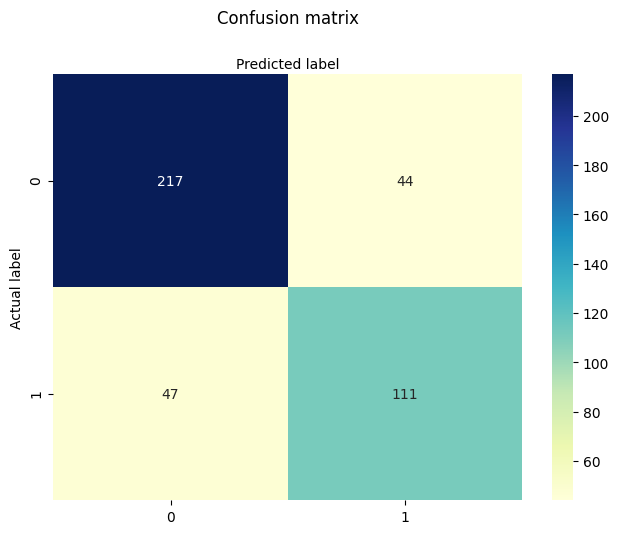

In [409]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [410]:
#Classification report to define precision and accuracy
from sklearn.metrics import classification_report
target_names = ['not survived', 'survived']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

not survived       0.82      0.83      0.83       261
    survived       0.72      0.70      0.71       158

    accuracy                           0.78       419
   macro avg       0.77      0.77      0.77       419
weighted avg       0.78      0.78      0.78       419



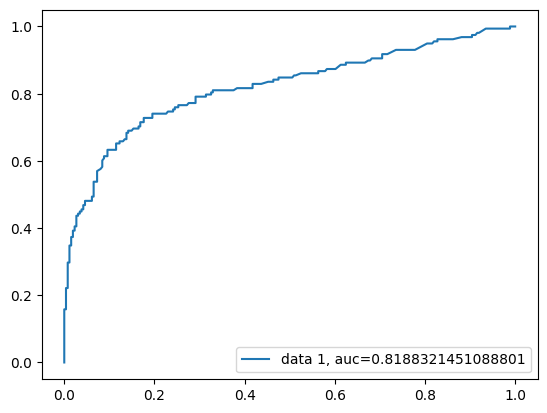

In [412]:
#AUC plot to determine real valid predictions and accuracy
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [413]:
#AUC score for the case is 0.81. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

In [414]:
y_test.head()

0    0
1    0
2    1
3    0
4    0
Name: survived, dtype: int64

In [415]:
#Failure attempt to print data out for submission
preds = logreg.predict(x_test)
print(preds)

[0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 1 1 0 1 0 0 1]


In [416]:
# create a dataframe for prediction

result = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [417]:
#Re-pull names from indexes across all dataset
titanic_df = pd.read_csv('titanic_cleaned.csv')
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1309 non-null   object 
 1   PassengerId  1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   survived     1309 non-null   int64  
 4   sex          1309 non-null   int64  
 5   age          1309 non-null   float64
 6   age_rnd      1309 non-null   int64  
 7   sibsp        1309 non-null   int64  
 8   parch        1309 non-null   int64  
 9   ticket       1309 non-null   object 
 10  fare         1309 non-null   float64
 11  cabin        1309 non-null   object 
 12  Decks        1309 non-null   int64  
 13  Location     1309 non-null   int64  
 14  embarked     1309 non-null   int64  
 15  boat         486 non-null    object 
 16  body         121 non-null    float64
 17  home.dest    745 non-null    object 
dtypes: float64(3), int64(10), object(5)
memory usage

In [418]:
#Add the name column back on to be able to identify and review results
result.insert(0, 'name', titanic_df['name'])
result

,name,Actual,Predicted
0,"Ross, Mr. John Hugo",0,0
1,"Rosenbaum, Miss. Edith Louise",0,0
2,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,0
3,"Brewe, Dr. Arthur Jackson",0,0
4,"Dulles, Mr. William Crothers",0,0
...,...,...,...
414,"Crosby, Capt. Edward Gifford",0,0
415,"Crosby, Miss. Harriet R",1,1
416,"Payne, Mr. Vivian Ponsonby",0,0
417,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",0,0


In [419]:
#Save file for submission
result.to_csv('Titanic_pred_results.csv')